In [9]:
#### imports
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

IMDB Movie review was chosen as a dataset for this project.
It contains movie reviews labelled as either positive or negative, and the 50000 size of the dataset makes it perfect for NLP tasks and comparisons, as it offers variety. The reviews themselves are writen in plain text and describe the user's feelings, experience, overall sentiment of a said movie.
The dataset is also balanced, as it has an equal number of positives and negatives, which makes it very suitable for classification tasks.

The absolute primary goal of this project is to understand these reviews and build (and later use) machine learning algorithms to model and classify sentiment analysis.

First step is to digest the dataset, by performing initial exploration, followed by cleaning and preporcessing the data. After special chars, tags and other possible blockages have been removed, the data can be transformed into numerical vectors which will later on feed the actual machine learning algorithms.




 Null Values
review       0
sentiment    0
dtype: int64

 Sentiment Distribution
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

--- Review Length Statistics ---
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


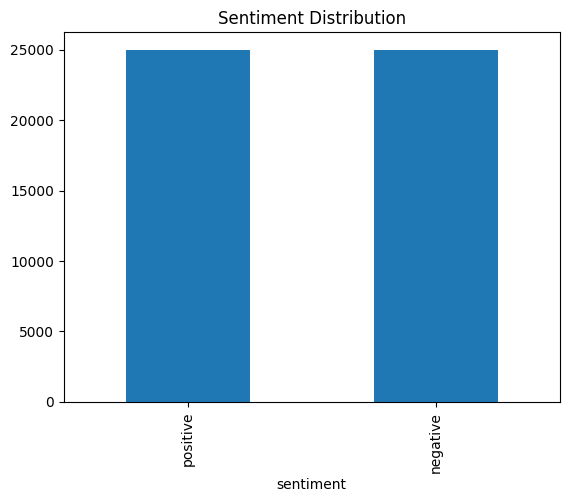

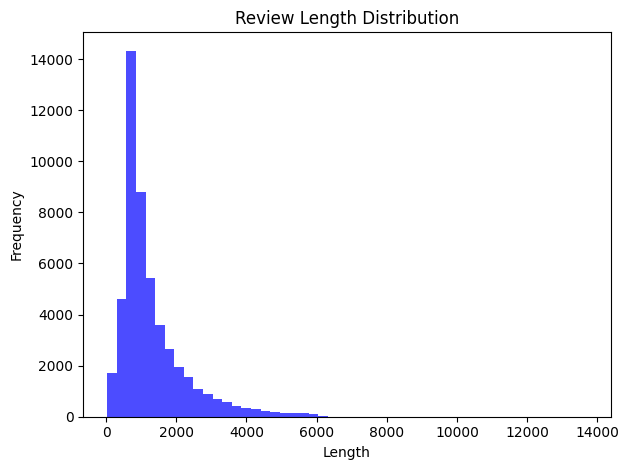


 Cleaned Review Samples 
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful way to spend ti...  
3  basically theres a family where a little boy j...  
4  petter matteis love in the time of money is a ...  

Training Set Size: 40000
Test Set Size: 10000


In [11]:
#### load dataset here
#### manual loading is preffered on this ocassion
file_path = '/content/IMDBDataset.csv'
data = pd.read_csv(file_path)

#### commencing data exploration
def explore_data(data):

    #### checking for null values and label distribution
    null_values = data.isnull().sum()
    #### print for debug
    print("\n Null Values")
    print(null_values)
    sentiment_distribution = data['sentiment'].value_counts()
    #### print for debug
    print("\n Sentiment Distribution")
    print(sentiment_distribution)

    #### exploring the review length, so no suprises come along
    data['review_length'] = data['review'].apply(len)
    text_length_stats = data['review_length'].describe()
    #### print for debug
    print("\n--- Review Length Statistics ---")
    print(text_length_stats)
    #### sentiment distribution
    sentiment_distribution.plot(kind='bar', title='Sentiment Distribution')
    plt.show()

    #### text length visual, in case anything wild is missed
    plt.hist(data['review_length'], bins=50, color='blue', alpha=0.7)
    plt.title('Review Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    return data

#### commencing preprocessing stage
#### remove tags (html), non-numerics, highcase to lowcase conversion, whitespace removal
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#### process the actual database in data
def preprocess_data(data):
    data['cleaned_review'] = data['review'].apply(preprocess_text)
    print("\n Cleaned Review Samples ")
    print(data[['review', 'cleaned_review']].head())
    return data

#### 2 datasets for training and testing purposes
#### sentiments are also given a binary value, positive is encoded as 1, negative encoded as 0
def split_data(data):
    X = data['cleaned_review']
    y = data['sentiment'].map({'positive': 1, 'negative': 0})
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

#### explore, preprocess and split
data = explore_data(data)
data = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(data)

print(f"\nTraining Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")


 TF-IDF vectorization
 Term-frequency inverse-domain-frequency was adopted in order for the text reviews to be converted into actual numerical vectors for our algorithms.

 The text reviews have been split into individual tokens with tfidf_vectorizer from scikit-learn.
 The number of maximum features was also limited to 5000, in order to focus on the most important words, which in turn reduces computation time.
 Local text within reviews was also implemented to produce unigrams and bigrams.

 tfidf_vectorizer produces is able to produce a sparse matrix in which each row and column represent a review and a word respectively- values within the matrix are the vectorisation score of said word in each review.

 Stop words have also been set to english, hence leading to the removal of "the" "and" and so on.

 The matrix is then used as input for KNN, MLP and Random Forest.

 revectorization is done frequently trhoughout the algorithms in order to ensure proper results everytime- I found that they sometimes change in a non-predicatble fashion after running certain sections.



 KNN implementation
 K-nearest-neighbour was used for classification in this task, although it can also be used for regression.
 In our context, KNN takes a movie review and classifies it via comparison to the closest neighbours in the space.

 Theory behind KNN:
 -it calculates distance between test sample and the other training samples.
 Closer means its more similar.
 -k is used to take the closest neighbour, after which it gets assigned a positive / negative snetiment label here, depening on commonality and majority vote.
 -knn does not train a modle per-se and it makes no assumptions about underlying data distribution
 -knn works well with vectorised text, but i can struggle with high-dimensions

In [12]:
#### text to numerical vectors via tf-idf
#### limitting to 5000 features for less computaitonal complexity (apologies, my hardware is not top-end)
#### again, creating a learning/testing set of sets, with sentiment encoding done manually
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


#### knn implementation, with K nearest neighbour 10.
knn = KNeighborsClassifier(n_neighbors=10)  # Use k=10
knn.fit(X_train, y_train)
#### prediction and evaluation
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\n KNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.7412

 KNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      4961
           1       0.72      0.79      0.75      5039

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



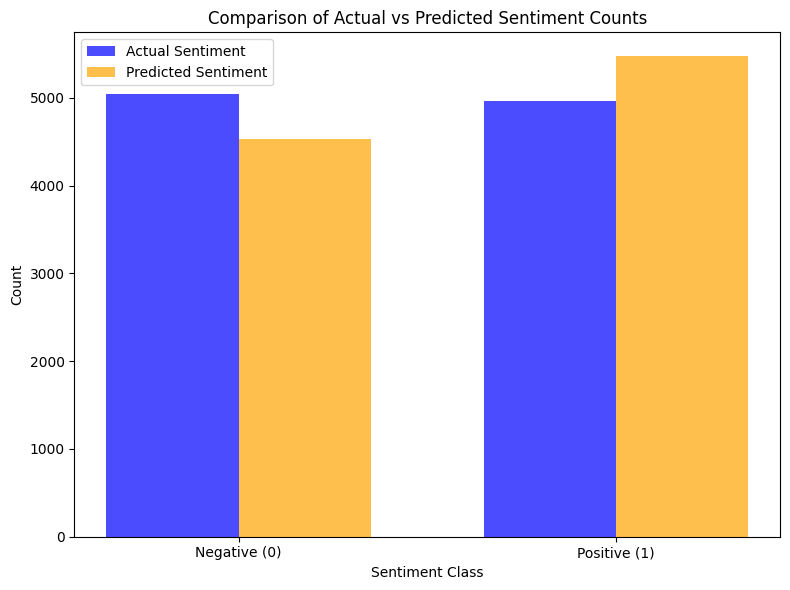

In [27]:
#### knn evaluation
#### count the actual disti of labels and predicted disti of labels
#### remember encoding, 1 - positive, 0 - negative
real_counts = y_test.value_counts()
predicted_counts = np.bincount(y_pred)
predicted_counts = {0: predicted_counts[0], 1: predicted_counts[1]}

#### bar chart for visuals... pictures paint thousand words
labels = ['Negative (0)', 'Positive (1)']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
#### actual sentiment
ax.bar(x - width/2, real_counts, width, label='Actual Sentiment', color='blue', alpha=0.7)
#### predicted sentiment
ax.bar(x + width/2, [predicted_counts[0], predicted_counts[1]], width, label='Predicted Sentiment', color='orange', alpha=0.7)
#### legend
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Count')
ax.set_title('Comparison of Actual vs Predicted Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [7]:
#### f1 score for completeness, eventhough this is not an imbalaced dataset
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-Score: {f1:.4f}")

Weighted F1-Score: 0.7402


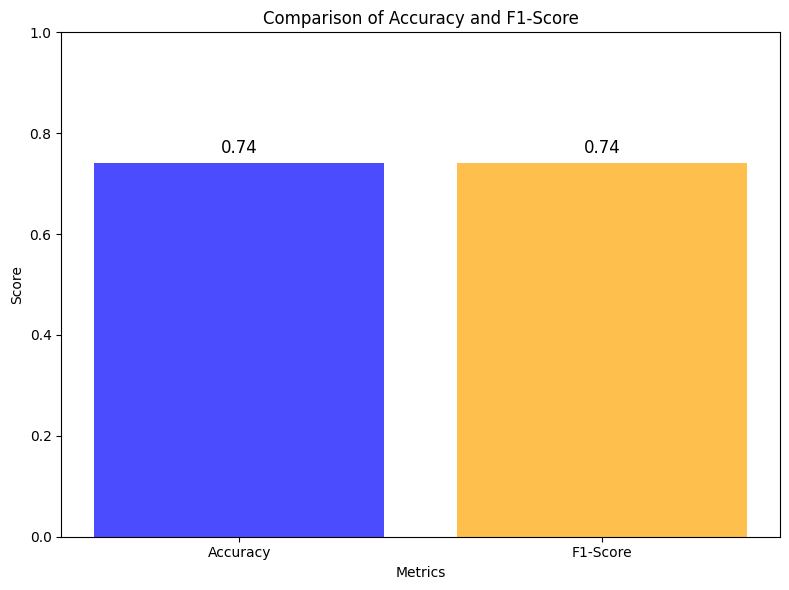

In [28]:
#### plot accuracy and f1 - similar results...
#### metrics are shown in percentages, hence the value of the plot 0-to-1, our accuracy here will be approx. 74%
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

### chart
metrics = ['Accuracy', 'F1-Score']
values = [accuracy, f1]
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Comparison of Accuracy and F1-Score')
plt.ylabel('Score')
plt.xlabel('Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [29]:
#### revectorize and show the matrix
#### include unigrams and also bigrams
#### apply to a smaller dataset
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review'])

#### output, but also good for debug
#### interesting to see top features
print(f"TF-IDF Matrix Size: {X_tfidf.shape}")
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nSample Features:", feature_names[:10])

TF-IDF Matrix Size: (50000, 5000)

Sample Features: ['abandoned' 'abc' 'abilities' 'ability' 'able' 'absence' 'absolute'
 'absolutely' 'absurd' 'abuse']


MLP
Multi-layer-perceptron is a neural network, feed-based, that's capable of learning non-linear and complex relationships in data, which makes it ideal for tasks like sentiment analysis and classification.

From an input perspective, it receives the preprocessed data and each neuron is assigned one input data feature.
Non-linear transformations are made using activation functions and sweighted sums.
More neurons and layers is equivalent to more complex relationships
The key processes in MLP are forward and back propagation together with the activation functions.
Layers are computed using weights, input and bias and then the RELu activation is applied for non-linearity.
The MLP then computes the actual loss between predicted and real values and the chain rule is used to calculate the gradients of the loss function.
Adam Optimizer is then used to minimise loss, therefore acting as an optimization algortihm.
Thus, it's able to cpature relationships of vast complexity, while offering flexibility and scalability.
It also needs proper regularization (our dataset is ideal, 50-50).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7008 - loss: 1.0073 - val_accuracy: 0.8486 - val_loss: 0.6857
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8202 - loss: 0.7097 - val_accuracy: 0.8506 - val_loss: 0.6615
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8280 - loss: 0.6902 - val_accuracy: 0.8600 - val_loss: 0.6448
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8293 - loss: 0.6872 - val_accuracy: 0.8541 - val_loss: 0.6489
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8362 - loss: 0.6780 - val_accuracy: 0.8558 - val_loss: 0.6426
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8371 - loss: 0.6796 - val_accuracy: 0.8554 - val_loss: 0.6424
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8449 - loss: 0.6714 - val_accuracy: 0.8550 - val_loss: 0.6496
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8390 - loss: 0.6755 - 

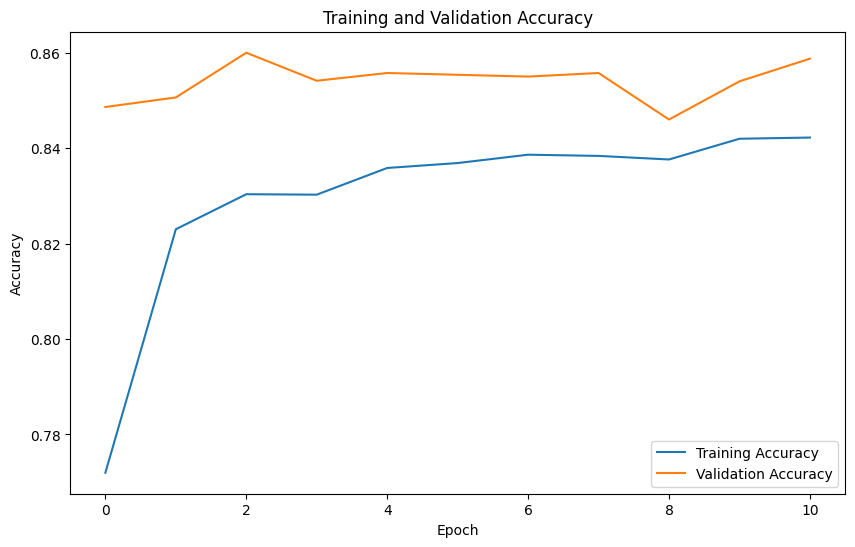

In [30]:
#### revectorization for good measure, sentiment encoding and limitting the dataset to 5000 features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review']).toarray()
y = data['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#### creating the input, hidden and output layers for MLP
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.6),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

#### compiling the actual model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### we also define the loss rate, to prevent the model from running with minimal improvements
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#### train and evaluate
#### convert probabilities to predicitions in a binary manner
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#### image paints a thousand words
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

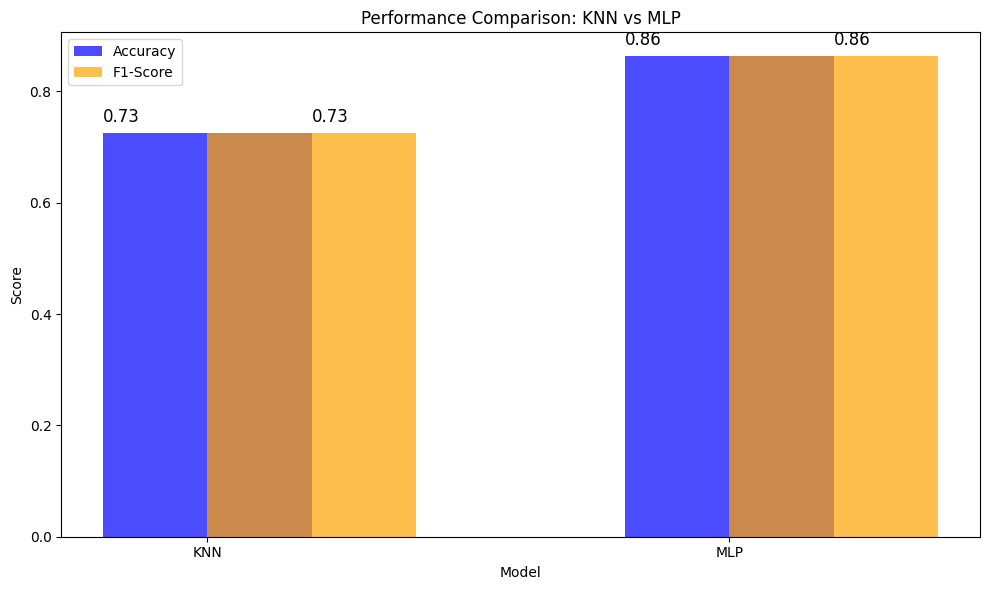

In [31]:
#### visual comparison between knn and mlp

#### manually setting accuracies for debug purposes
knn_accuracy = 0.7252
knn_f1 = 0.7252
mlp_accuracy = accuracy
mlp_f1 = f1_score(y_test, y_pred, average='weighted')

#### chart - accuracy comparison
models = ['KNN', 'MLP']
accuracy_values = [knn_accuracy, mlp_accuracy]
f1_values = [knn_f1, mlp_f1]
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, accuracy_values, width=0.4, label='Accuracy', align='center', color='blue', alpha=0.7)
plt.bar(x, f1_values, width=0.4, label='F1-Score', align='edge', color='orange', alpha=0.7)
plt.xticks(x, models)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Comparison: KNN vs MLP')
plt.legend()
for i, v in enumerate(accuracy_values):
    plt.text(i - 0.2, v + 0.02, f"{v:.2f}", fontsize=12)
for i, v in enumerate(f1_values):
    plt.text(i + 0.2, v + 0.02, f"{v:.2f}", fontsize=12)

plt.tight_layout()
plt.show()

In [34]:
### short and quick implementation of naive bayes - curiosity
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#### training and calculating using the NB model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8457

 Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



K-folds evaluation
The data was split and divided into k (in our case 5) sized folds.
Each iteration, used as a training set, is used against the k fold- therefore repeating the process 5 times and ensuring all data points are part of both training and testing sets. The output, in our case evaluation metrics, are averaged to give us a final estimate of performance.
After data is vectorized, each fold's accuracy was computed and data was also shuffled right ebfore the splitting to ensure distribution.
For KNN, we tested each fold by averaging the performance of its ability to classify sentiment.
For MLP, we used a more or less identical approach for consistency.

In [35]:
#### revectorize and enconde ssentiment
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment'].map({'positive': 1, 'negative': 0})

#### knn 5-fold cross valdiation
#### 5 folds
knn = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X_tfidf, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracies:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracies: [0.7568 0.7559 0.7685 0.7566 0.763 ]
Mean Accuracy: 0.7601600000000001


In [36]:
#### mlp kfold - 5 again
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

#### cross validation
for train_index, val_index in kf.split(X_tfidf):
    X_train, X_val = X_tfidf[train_index], X_tfidf[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    #### our mlp model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

#### compile, train and evaluate
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, verbose=0)
    y_pred = (model.predict(X_val.toarray()) > 0.5).astype(int)
    fold_accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(fold_accuracy)
print("Cross-Validation Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Cross-Validation Accuracies: [0.8724, 0.8761, 0.8777, 0.8731, 0.8713]
Mean Accuracy: 0.8741199999999999


Random Forest Novel NLP implementation as per https://www.researchgate.net/publication/372013555_Sentiment_Analysis_of_Movies_Based_on_Natural_Language_Processing


The paper shows a novel NLP random-forest-based approach that analyses sentiments of reviews.
It makes great use of ensemble to improve accuracy of classification and effectiveness, being particularly good for text datasets with many dimensional featured spaces, in our case generated by tf-idf.
It's able to combine predicitons of multiple decision trees, which reduces overfitting and imrpoves generalization.

Task is to classify movie reviews based on a large review dataset and metrics for measuring accurance and importance of different features are used for eval.

It applies the bagging tehnique, where each decision tree is a random tree subset of data - reducing variance and establishing stability.
The algorithm identifies key words that influence the prediction process, which allows for intepretable overviews of the dataset.

There is also emphasis place don fine tunning the hyperparametrs - tree , depth, split criteria.

Random Forest Accuracy: 0.858

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



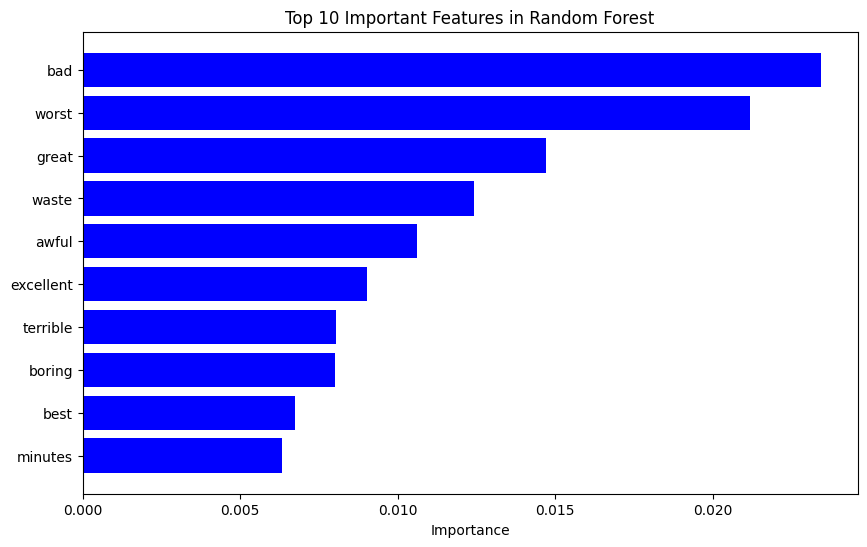

In [2]:
#### do the imports of this part separately, as it's an addon to the actual project
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#### processing the dataset
file_path = '/content/IMDBDataset.csv'
data = pd.read_csv(file_path)
#### vectorization and encoding
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['review'])
y = data['sentiment']

#### train and test random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=150,     #### no of trees
    max_depth=None,     #### no maximum depth
    criterion="gini",  #### splitting
    class_weight="balanced",
    random_state=42
)
rf_model.fit(X_train, y_train)

#### evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#### picture paints thousand words
#### extract importance and select top 10....
feature_importances = rf_model.feature_importances_
features = tfidf_vectorizer.get_feature_names_out()
indices = np.argsort(feature_importances)[-10:]
top_features = [features[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importances[indices], color="blue")
plt.xlabel("Importance")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

<ipython-input-3-8dc759c5a3bb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_reviews['predicted_sentiment'] = rf_model.predict(tfidf_vectorizer.transform(feature_reviews['review']))
<ipython-input-3-8dc759c5a3bb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_reviews['feature_sentiment'] = 1 if sentiment == "positive" else 0  # Positive: 1, Negative: 0
<ipython-input-3-8dc759c5a3bb>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

     feature  total_reviews  accuracy
0        bad          12704  0.755825
1      worst           4434  0.916554
2      great          13807  0.676179
3      waste           3656  0.910832
4      awful           3119  0.901571
5  excellent           3625  0.816276
6   terrible           2707  0.871075
7     boring           3116  0.819641
8       best           9856  0.639306
9  wonderful           3249  0.829178


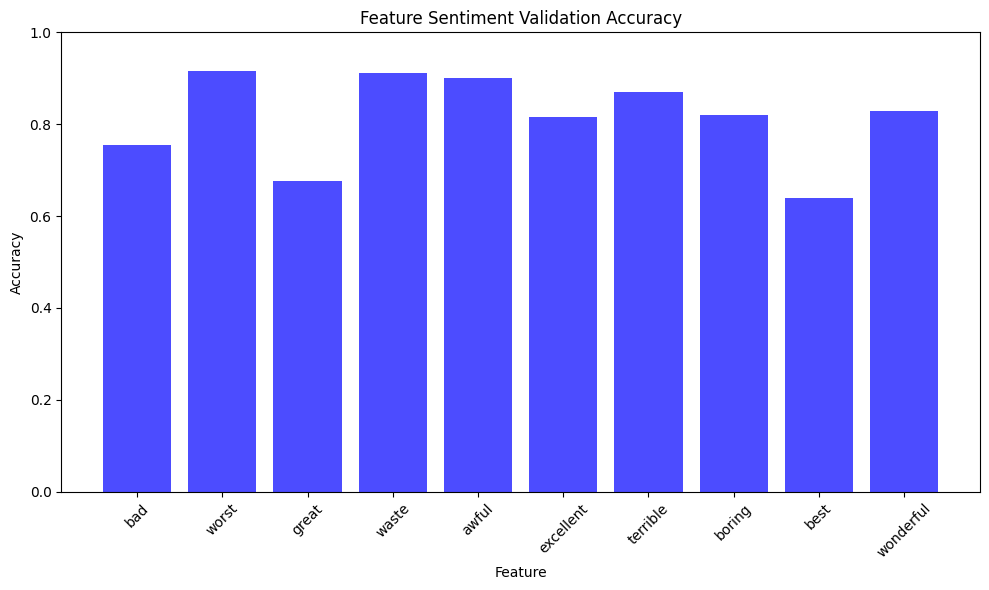

In [3]:
#### econding the results
feature_sentiments = {
    "bad": "negative",
    "worst": "negative",
    "great": "positive",
    "waste": "negative",
    "awful": "negative",
    "excellent": "positive",
    "terrible": "negative",
    "boring": "negative",
    "best": "positive",
    "wonderful": "positive"
}

#### validating the sentiment of feaures agains tthe dataset via a dataframe
def validate_feature_sentiment(data, feature_sentiments):
    results = []

    for feature, sentiment in feature_sentiments.items():
        #filter feature reviews
        feature_reviews = data[data['review'].str.contains(feature, case=False, na=False)]
        #### predicted sentiment from random forest
        feature_reviews['predicted_sentiment'] = rf_model.predict(tfidf_vectorizer.transform(feature_reviews['review']))
        #### classify
        feature_reviews['feature_sentiment'] = 1 if sentiment == "positive" else 0  # Positive: 1, Negative: 0

        #### and compare feature with predicted
        feature_reviews['match'] = feature_reviews['predicted_sentiment'] == feature_reviews['feature_sentiment']
        results.append({
            "feature": feature,
            "total_reviews": len(feature_reviews),
            "accuracy": feature_reviews['match'].mean() if len(feature_reviews) > 0 else 0
        })

    return pd.DataFrame(results)

#### validate and "picture paints thosuand words"
import matplotlib.pyplot as plt
results_df = validate_feature_sentiment(data, feature_sentiments)
print(results_df)
plt.figure(figsize=(10, 6))
plt.bar(results_df['feature'], results_df['accuracy'], color='blue', alpha=0.7)
plt.title("Feature Sentiment Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Feature")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


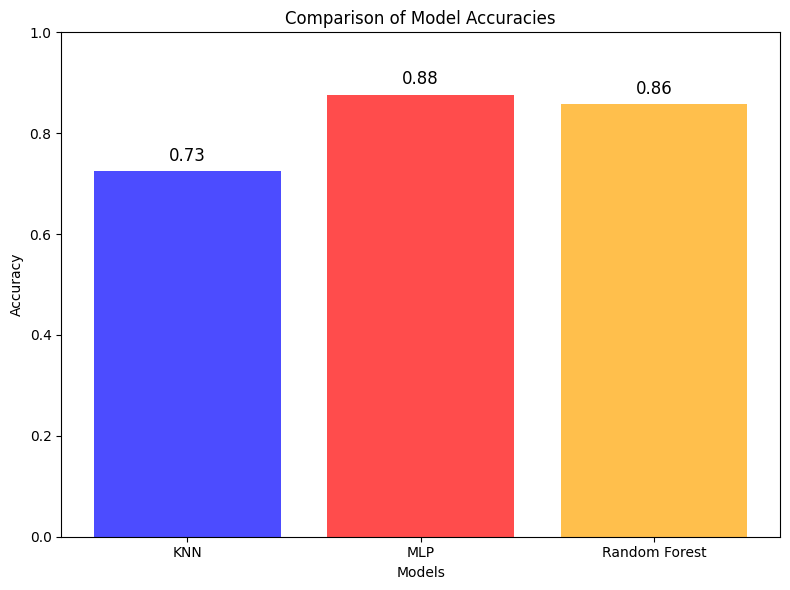

In [5]:
#### comapre the algorithms used
# Metrics from previous models
knn_accuracy = 0.7252  #### KNN accuracy
mlp_accuracy = 0.8766  ####  MLP accuracy
rf_accuracy = accuracy #### Random Forest accuracy

#### picture paints a thousand words
models = ['KNN', 'MLP', 'Random Forest']
accuracies = [knn_accuracy, mlp_accuracy, rf_accuracy]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'red', 'orange'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Interpretation

The KNN model comes in at 73% accuracy, which is well expected due to its struggles with high-dimensional datasets given by tfidf vectors. It's more or less reliant on distance metrics, which doesn't make it 100% effective for text datasets.

MLP delivers 88% accuracy, which speaks for its ability to learn and model complex nonlinear data relationships.

Random Forest strikes 85% accuracy, peticularly close to MLP which proves the ability to model non-linear relationships in a dataset better.
However, the implementation did underperform as well comapred to the reported result by the paper. This difference could be explainedby differences in hyperparameter tuning and variations within the datatset.

The paper emphasizes more complex feature and larger tree numbers, however I was running out of time.
